In [ ]:
#Did Tesla's stock price exhibit significant fluctuations immediately after reports of fatal accidents? 
#This includes looking at the stock price on the day of the accident and a few days following it.
# Is there a long-term trend in Tesla’s stock price that correlates with the frequency or severity of accidents over a certain period?
# How does market sentiment, as reflected in Tesla's stock price, respond to high-profile accidents?
# This can be measured by looking at price volatility and trading volumes.
# Does the involvement of specific Tesla models in fatal accidents have different impacts on the stock price?

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [26]:
# Load the provided datasets
raw_path = '/Users/cicizeng/Desktop/STA386/Semester Project/'
deaths_df = pd.read_csv(raw_path + "Tesla Deaths - Deaths.csv")
miles_df = pd.read_csv(raw_path + "Tesla Deaths - Miles.csv")
sudden_acceleration_df = pd.read_csv(raw_path + "Tesla Deaths - Sudden Acceleration.csv")


In [4]:
url = "https://www.alphavantage.co/query"
parameters = {
    "function": "TIME_SERIES_DAILY",
    "symbol": "TSLA",
    "apikey": " S2F6B0CDOL4E5C62"
}

response = requests.get(url, params=parameters)
data = response.json()
print(data)

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'TSLA', '3. Last Refreshed': '2023-12-08', '4. Output Size': 'Compact', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2023-12-08': {'1. open': '240.2700', '2. high': '245.2700', '3. low': '239.2701', '4. close': '243.8400', '5. volume': '103126829'}, '2023-12-07': {'1. open': '241.5500', '2. high': '244.0800', '3. low': '236.9800', '4. close': '242.6400', '5. volume': '107142262'}, '2023-12-06': {'1. open': '242.9200', '2. high': '246.5700', '3. low': '239.1709', '4. close': '239.3700', '5. volume': '125905295'}, '2023-12-05': {'1. open': '233.8700', '2. high': '246.6600', '3. low': '233.7000', '4. close': '238.7200', '5. volume': '137971115'}, '2023-12-04': {'1. open': '235.7500', '2. high': '239.3733', '3. low': '233.2902', '4. close': '235.5800', '5. volume': '104099817'}, '2023-12-01': {'1. open': '233.1400', '2. high': '240.1900', '3. low': '231.9000', '4. close': '238.8300

In [27]:

# Checking for missing values and data types
deaths_info = deaths_df.info()
miles_info = miles_df.info()
musk_claims_info = musk_claims_df.info()
sudden_acceleration_info = sudden_acceleration_df.info()
vehicle_years_info = vehicle_years_df.info()

# Displaying basic information about the datasets
deaths_info, miles_info, musk_claims_info, sudden_acceleration_info, vehicle_years_info



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 24 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Case #                                                                296 non-null    float64
 1   Year                                                                  296 non-null    float64
 2   Date                                                                  296 non-null    object 
 3    Country                                                              296 non-null    object 
 4    State                                                                296 non-null    object 
 5    Description                                                          297 non-null    object 
 6    Deaths                                                               301 non-null    float64
 7  

(None, None, None, None, None)

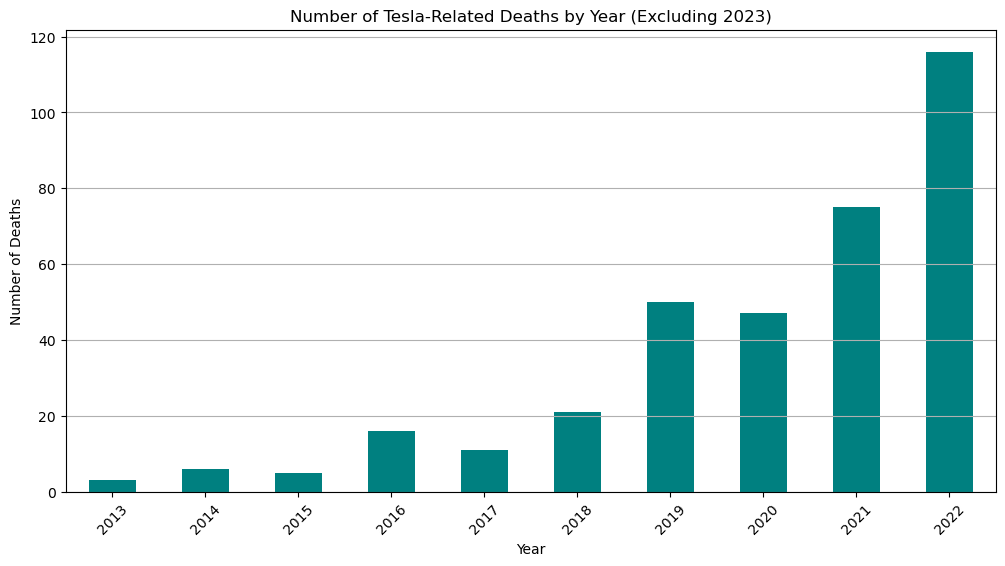

In [33]:
# Removing the data for the year 2023
deaths_df = deaths_df[deaths_df['Date'].dt.year < 2023]

# Re-aggregating the number of deaths by year after removing 2023 data
deaths_by_year = deaths_df.groupby(deaths_df['Date'].dt.year)['Deaths'].sum()

# Re-plotting the number of deaths by year without 2023 data
plt.figure(figsize=(12, 6))
deaths_by_year.plot(kind='bar', color='teal')
plt.title('Number of Tesla-Related Deaths by Year (Excluding 2023)')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


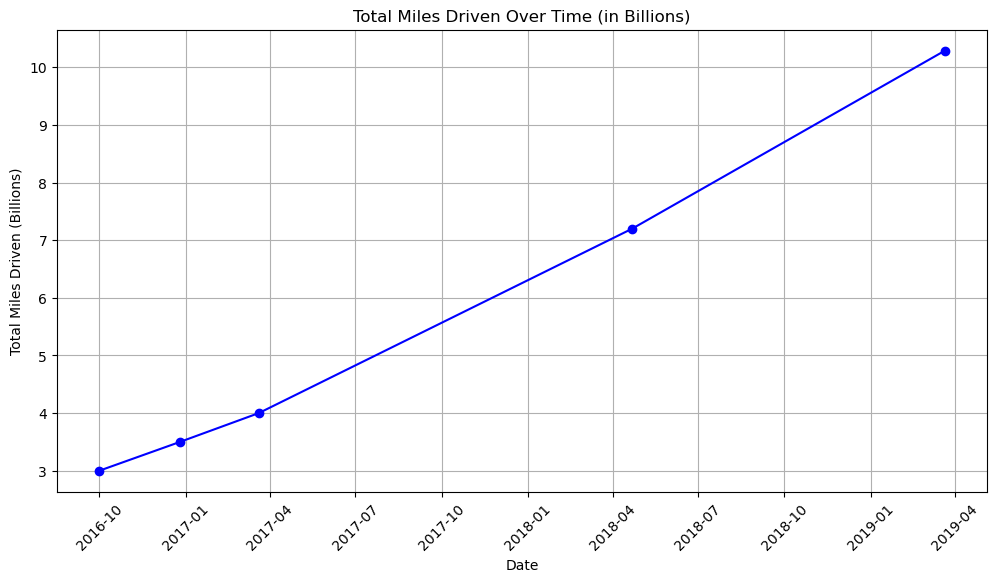

,Date,Total_Miles_Driven_Billions,Cumulative_Deaths
3,2019-03-21,10.286223,43.0
5,2018-04-22,7.200000,25.0
6,2017-03-20,4.000000,20.0
7,2016-12-26,3.500000,18.0
9,2016-10-01,3.000000,14.0


In [35]:
# Converting the 'Total_Miles_Driven' column to a more readable format (e.g., in billions of miles)
miles_df['Total_Miles_Driven_Billions'] = miles_df['Total_Miles_Driven'] / 1e9

# Re-plotting with the updated miles format
plt.figure(figsize=(12, 6))

# Line plot for Total Miles Driven (in billions)
plt.plot(miles_df['Date'], miles_df['Total_Miles_Driven_Billions'], color='blue', marker='o')
plt.title('Total Miles Driven Over Time (in Billions)')
plt.xlabel('Date')
plt.ylabel('Total Miles Driven (Billions)')
plt.xticks(rotation=45)
plt.grid()

plt.show()

# Displaying the updated miles data
miles_df[['Date', 'Total_Miles_Driven_Billions', 'Cumulative_Deaths']].head()


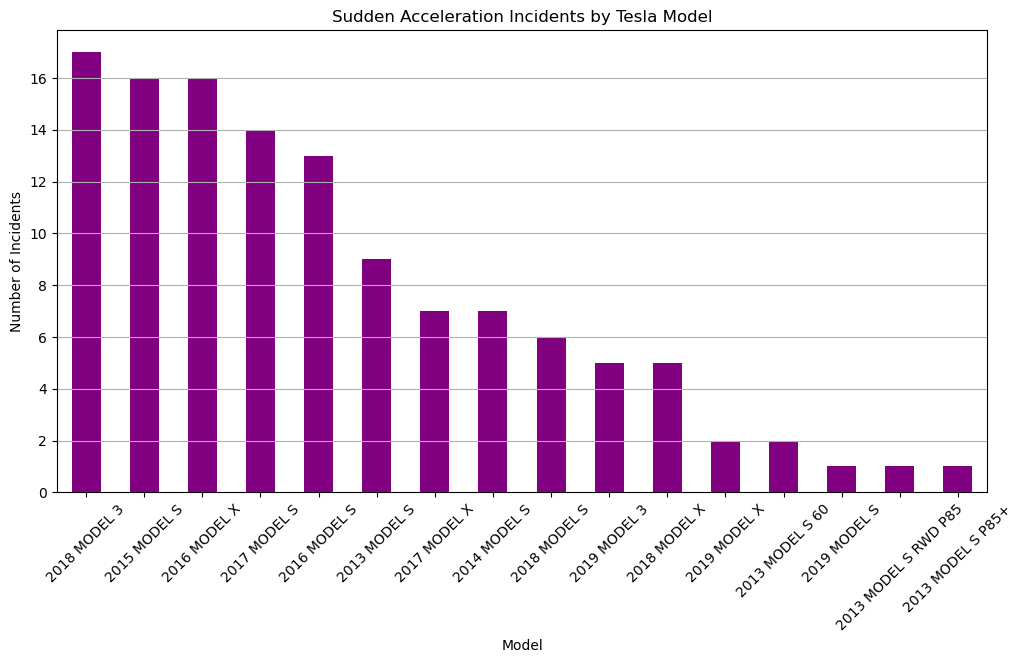

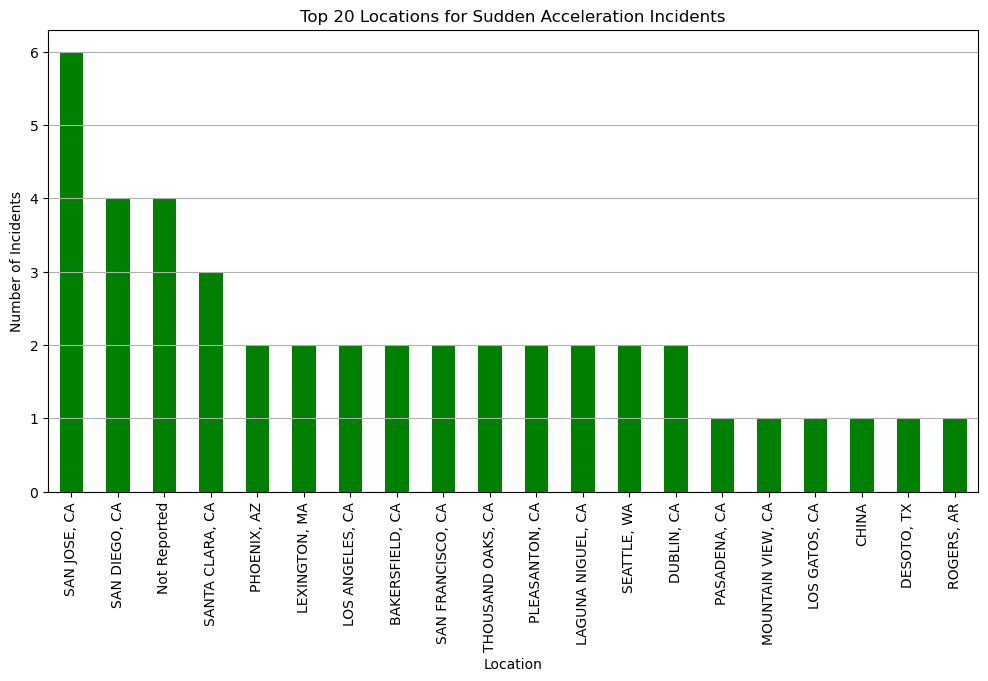

In [36]:
# Model Analysis: Counting the number of incidents per Tesla model
model_counts = sudden_acceleration_df['Model'].value_counts()

# Plotting the number of sudden acceleration incidents by Tesla model
plt.figure(figsize=(12, 6))
model_counts.plot(kind='bar', color='purple')
plt.title('Sudden Acceleration Incidents by Tesla Model')
plt.xlabel('Model')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Geographical Analysis: Counting the number of incidents per location
location_counts = sudden_acceleration_df['Location'].value_counts().head(20)  # Top 20 locations

# Plotting the number of sudden acceleration incidents by location
plt.figure(figsize=(12, 6))
location_counts.plot(kind='bar', color='green')
plt.title('Top 20 Locations for Sudden Acceleration Incidents')
plt.xlabel('Location')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()
